# Tasks 2 and 3 Implementations for Isomap Embedding

In this section, we employed the Isomap algorithm in both Sklearn and Megaman libraries and evaluated their performance. To utilize Megaman, the Python version must be 3.5.6 or earlier. The latest versions of Sklearn are compatible with the same Python version if we want to consider cut-off number of neighbors (`n_neighbors`) as an argument in the isomap's constructor function. However, for parts 3 to 6, we aim to compare the results based on cut-off `radius` as Megaman is only accept this value. Therefore, we require the use of newer versions of Sklearn, and therefore, newer version of numpy and python for running Sklearn. Besides, In our performance analysis, we tried to compare the results of Diffusion Map embeddings of the Datafold algorithm with the aformentioned results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataset import Dataset
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn import manifold, datasets
import time

from plot_fun import plot_2d, plot_3d, plot_eigenfunctions

%load_ext autoreload
%autoreload 2

## Part 1: Swiss Roll Data set
In this part we load swiss roll data set and after generating the embeddings for all algorithms, compare the performance results.

Set parameters for dataset

In [12]:
nr_samples = 20000         # Number of samples
nr_samples_plot = 5000    # Number of samples to plot

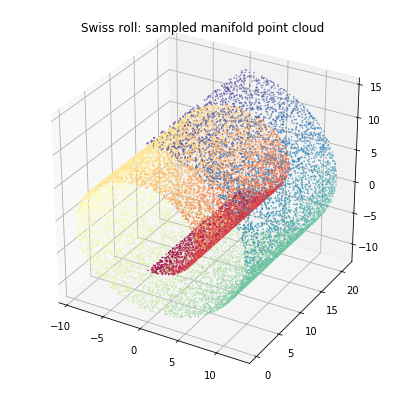

In [13]:
dataset = Dataset(nr_samples, nr_samples_plot)
positions, positions_color = dataset.generate_swiss_roll()
dataset.plot_swiss_roll(positions, positions_color)

### 1.1 Diffusion map using Implementation

In [4]:
from diffusion_map import DiffusionMap

In [5]:
part = 1                  # 1: our implementation 2: diffusion map data fold
n_evecs = 10              # L+1 largest eigenfunctions
radius = 2.5                # Radius around a point for distance computation

In [6]:
dmap = DiffusionMap()

start = time.time()
evecs, evals = dmap.compute_eigenfunctions(positions, n_evecs, radius)
end = time.time()

print(f"The run time is : {end - start}")

The run time is : 503.29767417907715


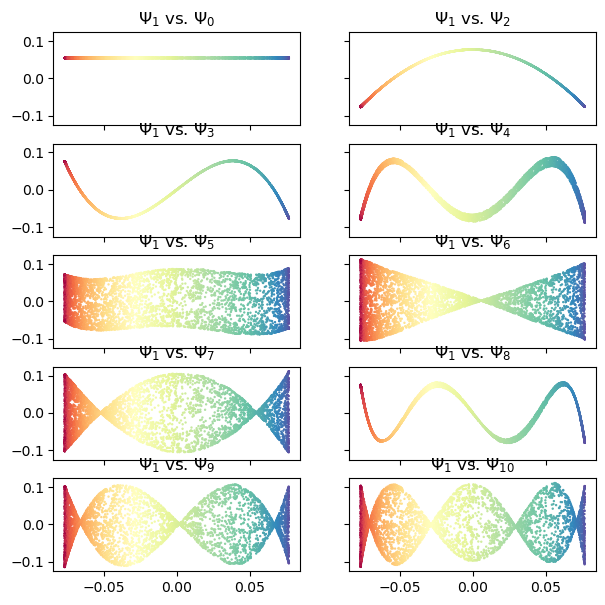

In [7]:
# Plot the eigenfunction phi_1 with respect to the others
plot_eigenfunctions(n_evecs, nr_samples, nr_samples_plot, part, evecs, evals, positions_color)

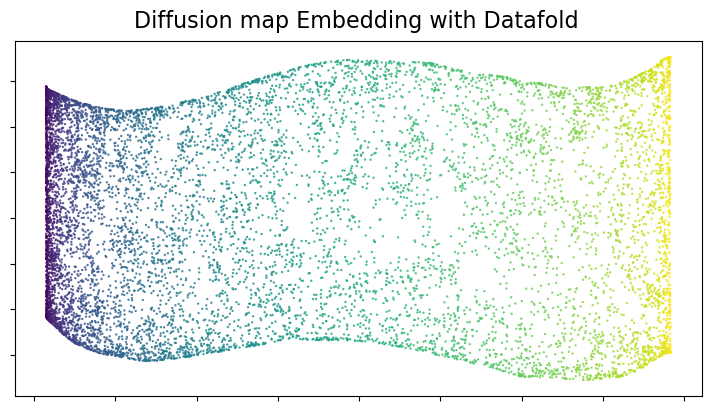

In [8]:
# plot the selected eigenvectors pair
from plot_fun import plot_2d
evecs_plot = np.column_stack((evecs[:, 1], evecs[:, 5]))
plot_2d(evecs_plot, positions_color, "Diffusion map Embedding with our Implementaions")

### 1.2 Diffusion map using Datafold library

In [9]:
from diffusion_map import DiffusionMap

In [10]:
part = 1                  # 1: our implementation 2: diffusion map data fold
n_evecs = 10              # L+1 largest eigenfunctions
radius = 5                # Radius around a point for distance computation (this value is computed by the datafold)

In [11]:
dmap = DiffusionMap()

start = time.time()
evecs, evals = dmap.compute_eigenfunctions_datafold(positions, n_evecs)
end = time.time()

print(f"The run time is : {end - start}")

The run time is : 2.598233938217163


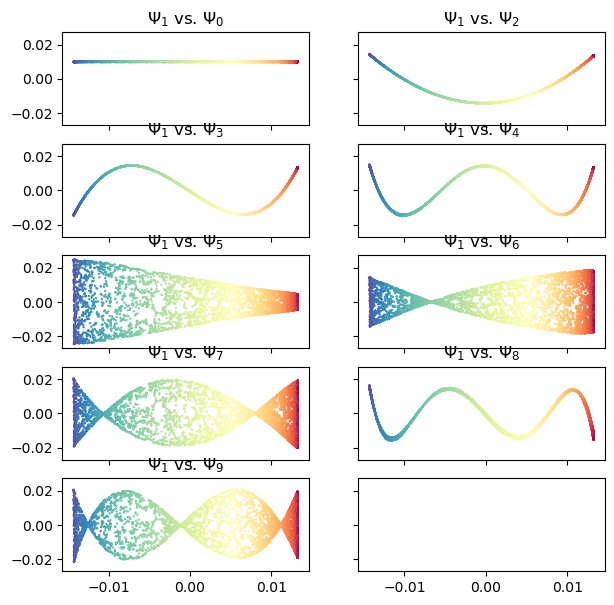

In [12]:
# Plot the eigenfunction phi_1 with respect to the others
plot_eigenfunctions(n_evecs, nr_samples, nr_samples_plot, part, evecs, evals, positions_color)

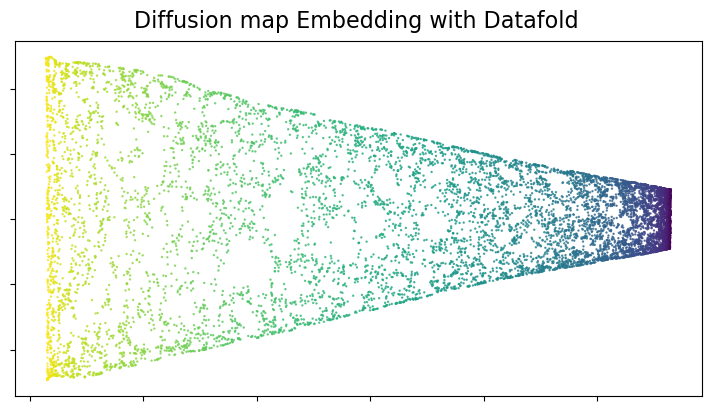

In [13]:
# plot the selected eigenvectors pair
from plot_fun import plot_2d
evecs_plot = np.column_stack((evecs[:, 1], evecs[:, 5]))
plot_2d(evecs_plot, positions_color, "Diffusion map Embedding with Datafold")


### 1.3 Isomap embedding using Sklearn library

In order to compare the libraries as fair as possible, we need to compare Megaman and Sklearn libraries based on the radius at each data point. For this we need to make sure the version of the sklearn is 1.2.1

In [6]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.1.


In [7]:
radius_based = True # false if you want to find embeddings based on the n_neighbors 

n_neighbors = 20     # neighborhood which is used to recover the locally linear structure
radius = 1.27           # radius which is used to recover the locally linear structure
n_components = 2     # number of coordinates of the embedding space

In [8]:
if radius_based:
    isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
else:
    isomap = manifold.Isomap(radius=radius, n_neighbors=None, n_components=n_components, eigen_solver='auto')

start = time.time()
S_isomap = isomap.fit_transform(positions)
end = time.time()

print(f"The run time is : {end - start}")

The run time is : 72.8809027671814


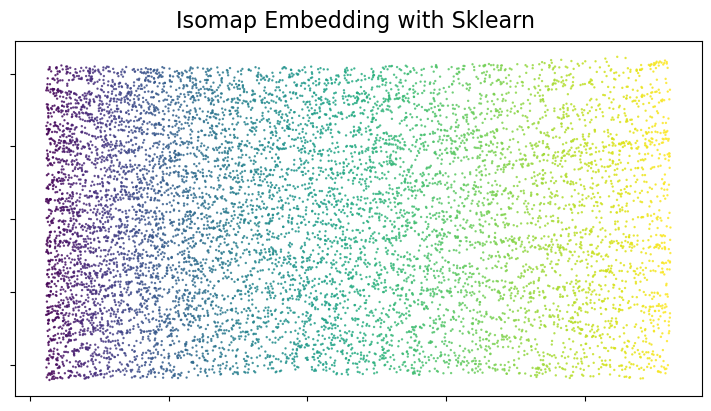

In [9]:
# Plot the reduced embedding space
plot_2d(S_isomap, positions_color, "Isomap Embedding with Sklearn")

### 1.4 Isomap embedding using Megaman library

In [14]:
from megaman.embedding import Isomap
from megaman_header import generate_geometry, check_connected_components

In [21]:
radius_based = True # false if you want to find embeddings based on the n_neighbors 

n_neighbors = 20     # neighborhood which is used to recover the locally linear structure
radius = 0.8           # radius which is used to recover the locally linear structure
n_components = 2     # number of coordinates of the embedding space

In [25]:
# Generate the graph based on the cut-off raduis around the datapoints
geom = generate_geometry(radius)
geom.set_data_matrix(positions)

if radius_based:
    check_connected_components(radius, geom)

The number of connected components is: 
1


In [26]:
isomap = Isomap(n_components=n_components, eigen_solver='arpack',geom=geom)

start = time.time()
# Apply Isomap dimensionality reduction to the positions data
embed_isomap = isomap.fit_transform(positions)
end = time.time()
 
# Print the time taken to apply Isomap
print(end - start)

/home/erfan/anaconda3/envs/manifold_env/lib/python3.5/site-packages/sklearn/utils/validation.py:457: DeprecationWarning: Passing 'None' to parameter 'accept_sparse' in methods check_array and check_X_y is deprecated in version 0.19 and will be removed in 0.21. Use 'accept_sparse=False'  instead.
  " instead.", DeprecationWarning)


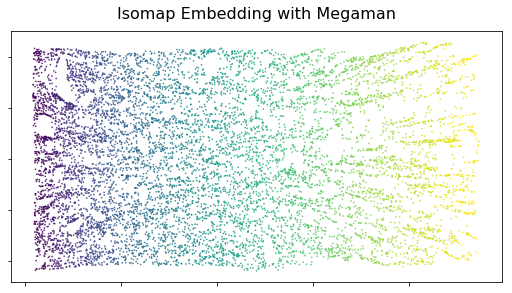

In [11]:
# Plot the reduced embedding space
plot_2d(embed_isomap, positions_color, "Isomap Embedding with Megaman")

### Part 2: World2vec Data set
In this part we have generated the Isomap embedding of Sklearn and Megaman for the word2vec dataset

In [2]:
from dataset import generate_word2vec_dataset

In [ ]:
nr_samples = 100   # number of samples datapoints from the 100-dimensional vectors

# sample from the data set before starting dimensionality reduction process
vecs, idx = generate_word2vec_dataset(nr_samples)

### 2.1 Isomaps embedding of Sklearn
set the parameters

In [27]:
radius_based = True # false if you want to find embeddings based on the n_neighbors 

n_neighbors = 100     # neighborhood which is used to recover the locally linear structure
radius = 15           # radius which is used to recover the locally linear structure
n_components = 3     # number of coordinates of the embedding space

In [28]:
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)

start = time.time()
word2vec_isomap = isomap.fit_transform(vecs[idx])
end = time.time()
 
# Print the time taken to apply Isomap
print(end - start)

314.2693259716034


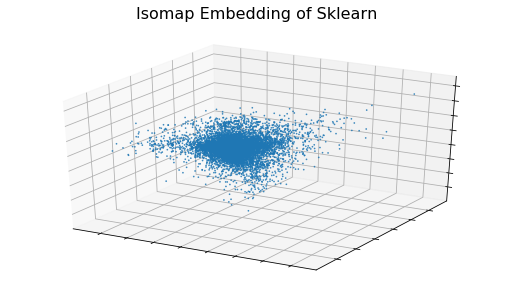

In [29]:
# Plot the reduced embedding space
plot_3d(word2vec_isomap, "Isomap Embedding of Sklearn")

### Part 6: World2vec Data set embedding using Megaman Isomap Library

In [30]:
from megaman.embedding import Isomap
from megaman_header import generate_geometry, check_connected_components

In [37]:
radius_based = True # false if you want to find embeddings based on the n_neighbors 

n_neighbors = 100     # neighborhood which is used to recover the locally linear structure
radius = 15           # radius which is used to recover the locally linear structure
n_components = 3     # number of coordinates of the embedding space

In [32]:
# Generate the graph based on the cut-off raduis around the datapoints
geom = generate_geometry(radius)
geom.set_data_matrix(vecs[idx])


check_connected_components(radius, geom)

The number of connected components is: 
1


In [38]:
isomap = Isomap(n_components=n_components, eigen_solver='arpack',geom=geom)

start = time.time()
# Apply Isomap dimensionality reduction to the positions data
embed_isomap = isomap.fit_transform(vecs[idx])
end = time.time()
 
# Print the time taken to apply Isomap
print(end - start)

/home/erfan/anaconda3/envs/manifold_env/lib/python3.5/site-packages/sklearn/utils/validation.py:457: DeprecationWarning: Passing 'None' to parameter 'accept_sparse' in methods check_array and check_X_y is deprecated in version 0.19 and will be removed in 0.21. Use 'accept_sparse=False'  instead.
  " instead.", DeprecationWarning)


395.18826246261597


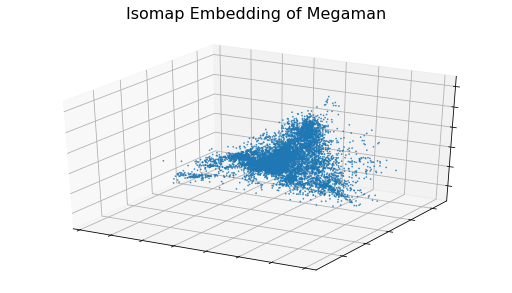

In [40]:
# Plot the reduced embedding space
plot_3d(embed_isomap, "Isomap Embedding of Megaman")